In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Ubicacion de archivos
document = "C:/Users/Lenovo/OneDrive/Escritorio/Analisis de datos"
data_energy_plant_1 = document + "/data_plantas_1.xlsx"
data_energy_plant_2 = document + "/data_plantas_2.xlsx"

In [4]:
# Data Frame
df_plant_1 = pd.read_excel(data_energy_plant_1)
df_plant_2 = pd.read_excel(data_energy_plant_2)
df_all_plant = pd.concat([df_plant_1, df_plant_2])

In [20]:
#Verificacion de dataFrame
df_plant_1.head()
df_plant_2.head()
df_all_plant.head()

,id_i,fecha_im,id_p,apparent_power_im,ac_current_im,ac_voltage_phase1_im,ac_voltage_phase2_im,ac_voltage_phase3_im,dc_current_im,dc_power_im,...,power_factor_im,imputed_im,ac_current_phase1_im,ac_current_phase2_im,ac_current_phase3_im,cos_phi_im,cod_alerta_inversor_medicion,fecha_recepcion_inversor_medicion,fecha_act_inversor_medicion,imputado_inversor_medicion
0,4799,2022-11-10 00:00:00,218,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-10 00:05:01.839,NaN,0
1,4804,2022-11-10 00:00:00,218,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-10 00:05:01.851,NaN,0
2,4801,2022-11-10 00:00:00,218,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-10 00:05:01.855,NaN,0
3,4803,2022-11-10 00:00:00,218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-10 00:05:01.858,NaN,0
4,4799,2022-11-10 00:05:00,218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-10 00:10:02.424,NaN,0


In [5]:
#Suma de active power diario plantas 1,2 y ambas plantas
all_power_plant_1 = df_plant_1['active_power_im'].sum()
all_power_plant_2 = df_plant_2['active_power_im'].sum()
all_power_plants = df_all_plant['active_power_im'].sum()
print("Produccion planta solar uno: ",all_power_plant_1)
print("Produccion planta solar dos: ",all_power_plant_2)
print("Produccion total ambas plantas: ",all_power_plants)

Produccion planta solar uno:  3664916.0 volt
Produccion planta solar dos:  2520597.0 volt
Produccion total ambas plantas:  6185513.0 volt


In [6]:
# Energia de activacion minima y maxima planta 1
energy_max_plant_1 = df_plant_1["active_energy_im"].max()
energy_min_plant_1 = df_plant_1["active_energy_im"].min()
print("Energia activacion minima: ", energy_min_plant_1,"\nEnergia activacion maxima: ",energy_max_plant_1)

Energia activacion minima:  46870800 
Energia activacion maxima:  76978296


In [7]:
# Energia de activacion minima y maxima planta 2
energy_max_plant_2 = df_plant_2["active_energy_im"].max()
energy_min_plant_2 = df_plant_2["active_energy_im"].min()
print("Energia activacion minima: ", energy_min_plant_2,"\nEnergia activacion maxima: ",energy_max_plant_2)

Energia activacion minima:  100358904 
Energia activacion maxima:  112923304


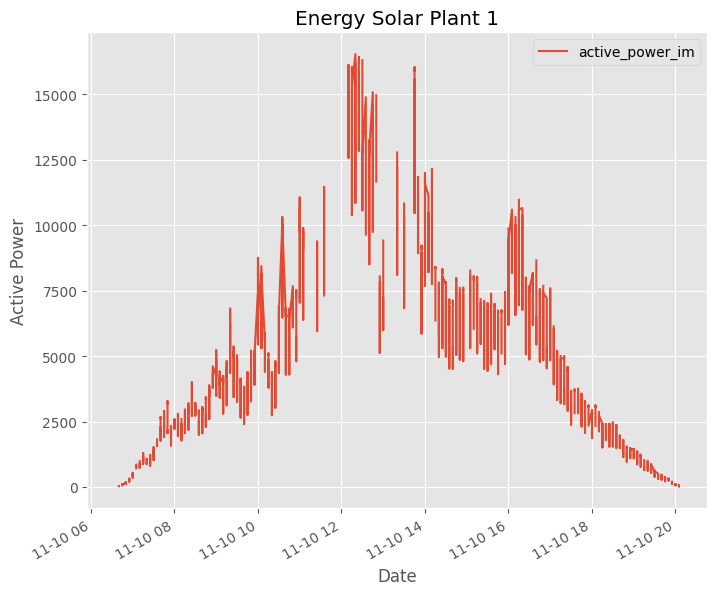

Grafico guardado en: c:\Users\Lenovo\OneDrive\Escritorio\Analisis de datos


In [65]:
# Grafico Planta Solar Uno
def graph_1():
    df_plant_1.plot(x="fecha_im", y="active_power_im", rot=30, figsize=(8,7))
    plt.style.use('ggplot')
    plt.xlabel("Date")
    plt.ylabel("Active Power")
    plt.title("Energy Solar Plant 1")
    plt.savefig("Grafico 1.jpg")
    plt.show()
    print("Grafico guardado en: "+os.getcwd())
    
graph_1()

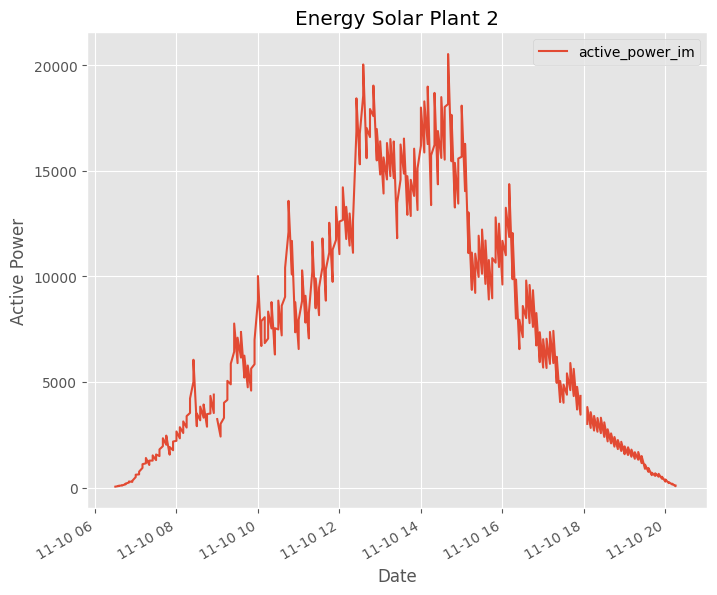

In [58]:
# Grafico Planta Solar Dos
def graph_2():
    df_plant_2.plot(x="fecha_im", y="active_power_im", rot=30, figsize=(8,7))
    plt.style.use('ggplot')
    plt.xlabel("Date")
    plt.ylabel("Active Power")
    plt.title("Energy Solar Plant 2")
    plt.savefig("Grafico 2.jpg")
    plt.show()
    print("Grafico guardado en: "+os.getcwd())

graph_2()

In [64]:
def archivo():  
    a,b,c =all_power_plant_1, all_power_plant_2, all_power_plants
    max_plant_1, min_plant_1 = energy_max_plant_1, energy_min_plant_1
    max_plant_2, min_plant_2 = energy_max_plant_2, energy_min_plant_2
    ubicacion = os.getcwd()
    archivo = open("archivo.txt", "w")
    archivo.write("Suma de active power segun planta solar\n")
    archivo.write("Suma planta solar uno: "+str(a)+"\n")
    archivo.write("Suma planta solar dos: "+str(b)+"\n")
    archivo.write("Suma ambas plantas solares: "+str(c)+"\n")
    archivo.write("Valores maximos y minimo de active energy en las plantas \n")
    archivo.write("planta 1 \nminimo: "+str(min_plant_1)+" maximo: "+str(max_plant_1)+"\n")
    archivo.write("planta 2 \nminimo: "+str(min_plant_2)+" maximo: "+str(max_plant_2)+"\n")
    archivo.write("Archivo guardados en: " +str(ubicacion))
    print("datos almacenados")

archivo()


datos almacenados
